In [1]:
import numpy as np
import matplotlib
import pandas as pd


dataset = pd.read_csv('/Users/wzhang/Documents/injury data cleaned.csv')

train = dataset.iloc[:743,:]
test = dataset.iloc[743:,:]
print(train)
print(test)
X_train = pd.DataFrame(train.iloc[:,4:15].values)
Y_train = train.iloc[:,16:].values
print(X_train.shape)
print(Y_train.shape)
X_test = pd.DataFrame(test.iloc[:,4:15].values)
Y_test = test.iloc[:,16:].values
print(X_test.shape)
print(Y_test.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

          Date  Site  Latitude (decimal deg)  Longitude (decimal deg)  \
0    5/29/2013   WE6                 41.7134                 -83.3804   
1    5/29/2013   WE8                 41.8343                 -83.3633   
2    5/29/2013   WE4                 41.8267                 -83.1930   
3    6/10/2013   WE6                 41.7144                 -83.3805   
4    6/10/2013   WE8                 41.8353                 -83.3631   
..         ...   ...                     ...                      ...   
738  10/7/2019  WE16                 41.6599                 -83.1467   
739  10/7/2019  WE13                 41.7428                 -83.1354   
740  10/7/2019  WE12                 41.7023                 -83.2639   
741  10/7/2019   WE4                 41.8270                 -83.1949   
742  6/16/2020   WE6                 41.7054                 -83.3864   

     Secchi Depth (m)  CTD Temperature (°C)  \
0                1.60                  18.5   
1                1.00        

In [2]:
features = pd.DataFrame(dataset.iloc[:,4:15])
features = features.columns
print(features)

Index(['Secchi Depth (m)', 'CTD Temperature (°C)',
       'CTD Specific Conductivity (µS/cm)', 'CTD Dissolved Oxygen (mg/L)',
       'Turbidity (NTU)', 'Total Phosphorus (µg P/L)',
       'Total Dissolved Phosphorus (µg P/L)', 'Ammonia (µg N/L)',
       'Nitrate + Nitrite (mg N/L)', 'Particulate Organic Carbon (mg/L)',
       'Particulate Organic Nitrogen (mg/L)'],
      dtype='object')


In [3]:
from keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dropout, Dense, BatchNormalization, GRU, LayerNormalization, MultiHeadAttention,TimeDistributed, Input, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 

2024-07-05 12:54:08.690000: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Initialize Random Forest regressor
model = DecisionTreeRegressor(min_samples_split = 2, min_samples_leaf = 1, random_state=42)

# Train the model
model.fit(X_train, Y_train)




DecisionTreeRegressor(random_state=42)

In [5]:
res = model.predict(X_test)
res.reshape(96,1)
print(res)
print(res.shape)

[ 6.11 17.35  2.71 10.67  2.55 35.12 19.29  7.48  7.48  4.25  1.27 34.37
 12.39  4.25  5.09 62.18 12.26 46.46  8.24 32.51 18.69 63.91  9.54 10.89
  7.42 11.39 63.91 35.23 63.91  9.07 10.1  38.4   2.2  22.85 26.   55.04
  8.25 10.89 11.96  4.65 44.09 26.   88.48 29.45 25.22 26.    6.22 44.09
 42.9  88.92 25.22 10.67 10.67 10.89 24.96 24.96 50.69 16.63  6.12 28.86
  6.22 54.99 16.26 19.37 12.32  5.26 16.63  1.82 33.54 26.   14.   16.63
 11.12 26.    3.73 18.5  24.64 19.37 16.63 26.   26.    5.07  7.42 16.63
 30.36 19.37  9.21 10.76  3.79 11.12  6.29  6.89  5.07  2.68 11.12  2.54]
(96,)


In [6]:
res = model.predict(X_test)
print(res)

from sklearn.metrics import r2_score 
r2 = r2_score(Y_test, res) 
print(r2)
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(Y_test,res)
print(mae)
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y_test,res)
print(mape)
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(Y_test,res)
print(rmse)


[ 6.11 17.35  2.71 10.67  2.55 35.12 19.29  7.48  7.48  4.25  1.27 34.37
 12.39  4.25  5.09 62.18 12.26 46.46  8.24 32.51 18.69 63.91  9.54 10.89
  7.42 11.39 63.91 35.23 63.91  9.07 10.1  38.4   2.2  22.85 26.   55.04
  8.25 10.89 11.96  4.65 44.09 26.   88.48 29.45 25.22 26.    6.22 44.09
 42.9  88.92 25.22 10.67 10.67 10.89 24.96 24.96 50.69 16.63  6.12 28.86
  6.22 54.99 16.26 19.37 12.32  5.26 16.63  1.82 33.54 26.   14.   16.63
 11.12 26.    3.73 18.5  24.64 19.37 16.63 26.   26.    5.07  7.42 16.63
 30.36 19.37  9.21 10.76  3.79 11.12  6.29  6.89  5.07  2.68 11.12  2.54]
0.719020633122501
6.169791666666666
0.46968113521383065
9.702677894959377


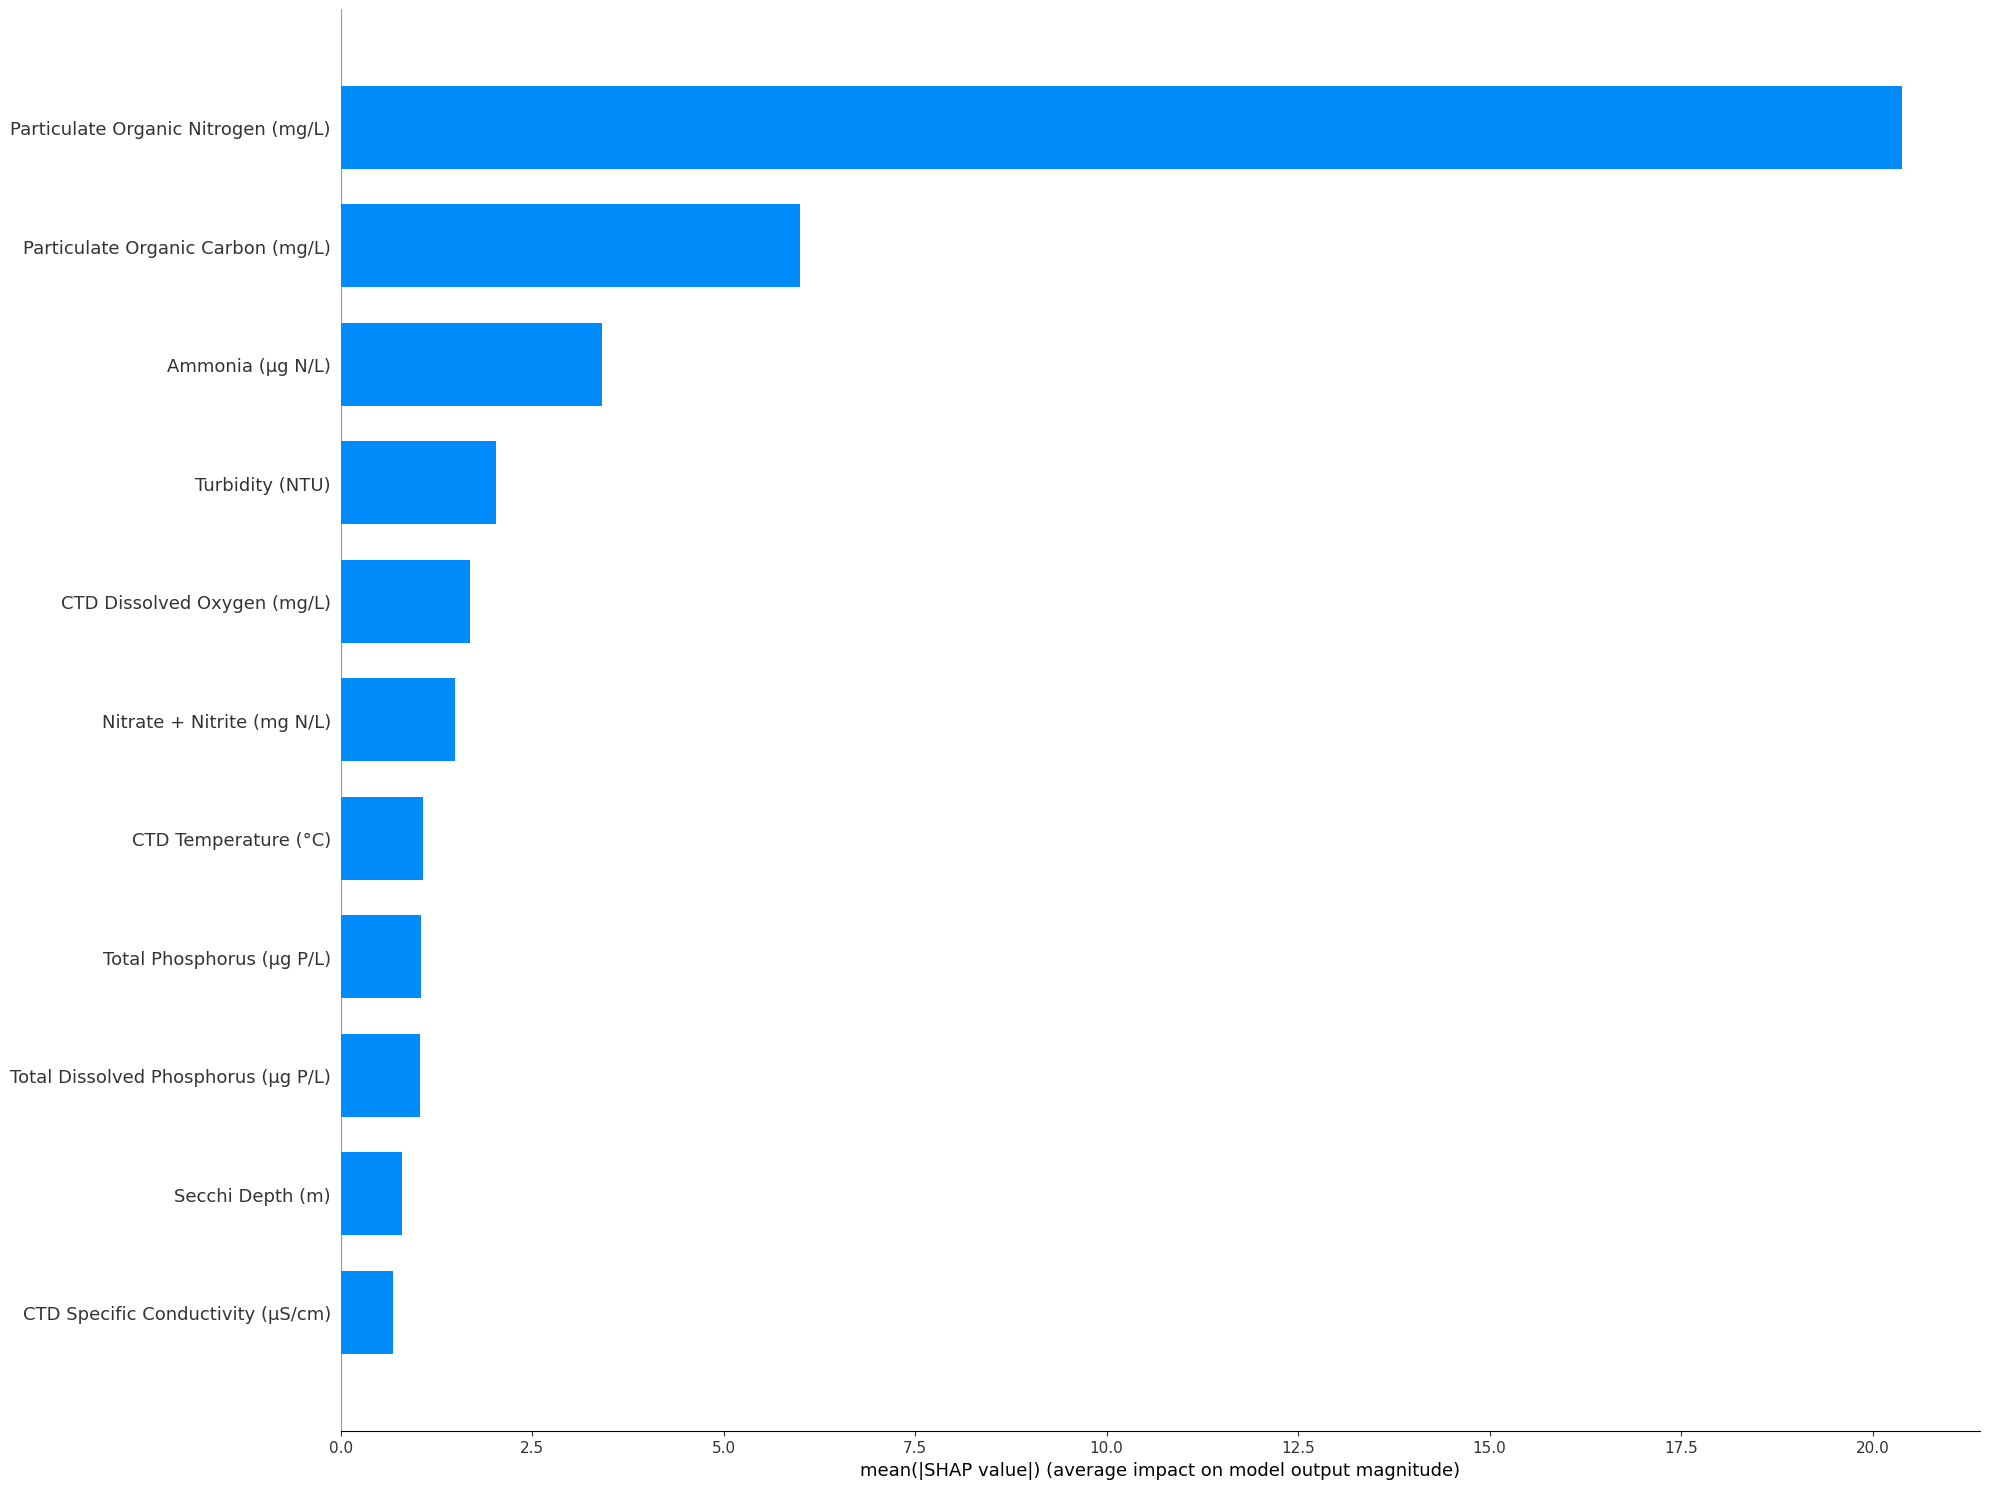

In [9]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train)
import matplotlib.pyplot as plt 
shap.summary_plot(shap_values, X_train,feature_names = features,plot_size=(20,15),plot_type="bar",show=False)


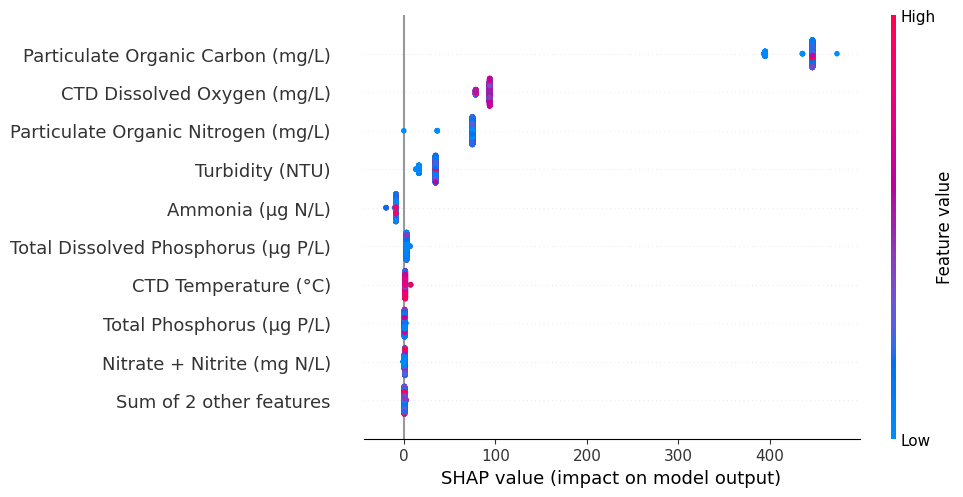

In [11]:
X_test_shap = pd.DataFrame(train.iloc[:,4:15])
shap_values = explainer(X_test_shap)
shap.plots.beeswarm(shap_values=shap_values)

In [12]:
print(shap_values)

.values =
array([[3.75876131e-01, 1.41385599e+00, 1.17680352e-01, ...,
        1.03362494e+00, 3.94699967e+02, 7.47215642e+01],
       [3.75876131e-01, 1.41385599e+00, 1.17680352e-01, ...,
        1.03362494e+00, 3.94699967e+02, 7.47215642e+01],
       [3.75876131e-01, 1.41385599e+00, 1.17680352e-01, ...,
        1.03362494e+00, 3.94699967e+02, 7.47215642e+01],
       ...,
       [3.90083938e-01, 1.42349762e+00, 1.31745074e-01, ...,
        1.18257582e-01, 4.46542100e+02, 7.49079826e+01],
       [3.90338805e-01, 1.42709823e+00, 1.01150558e-01, ...,
        4.54210218e-01, 3.94740229e+02, 7.47618255e+01],
       [4.01874294e-01, 1.40486533e+00, 1.18717956e-01, ...,
        1.03645759e+00, 3.94692110e+02, 7.47137065e+01]])

.base_values =
array([31.73426649, 31.73426649, 31.73426649, 31.73426649, 31.73426649,
       31.73426649, 31.73426649, 31.73426649, 31.73426649, 31.73426649,
       31.73426649, 31.73426649, 31.73426649, 31.73426649, 31.73426649,
       31.73426649, 31.73426649, 31.7